In [1]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
import numpy as np
import pandas as pd

# Data import, Data Reading and Understanding

In [5]:
bikedata= pd.read_csv('Downloads/day.csv')
bikedata.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bikedata.shape

(730, 16)

In [12]:
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [14]:
bikedata.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [16]:
#no null valuesin any of the column

# Pre-processing Step

In [19]:
# Columns instant (not much use), casual and registered columns can be dropped as casual and registered summation gives cnt (dependent variable) 

In [21]:
bikedata= bikedata.drop(['instant','casual','registered'], axis=1)

In [23]:
#dteday can also be deleted as we have yr and month data seperately

In [25]:
bikedata= bikedata.drop(['dteday'], axis=1)

In [27]:
bikedata.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [29]:
bikedata.shape

(730, 12)

In [31]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [33]:
#Bases on the given data, variables-season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' are categorical variables with nominal data.
#Mapping of categorical columns

In [35]:
bikedata['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [37]:
bikedata['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [39]:
bikedata['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [41]:
bikedata['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [43]:
bikedata['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [45]:
bikedata['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [47]:
bikedata['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [49]:
#'yr', 'holiday' and 'workingday' columns have binary number. so not mapping to category astype for these 3 as of now. Mapping other categorical columns

In [51]:
bikedata['season']=bikedata['season'].astype('category')

In [53]:
bikedata['mnth']=bikedata['mnth'].astype('category')

In [55]:
bikedata['weekday']=bikedata['weekday'].astype('category')

In [57]:
bikedata['weathersit']=bikedata['weathersit'].astype('category')

In [59]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# Exploratory Data Analysis

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [64]:
cat_cols= ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

In [65]:
# Univariate Analysis

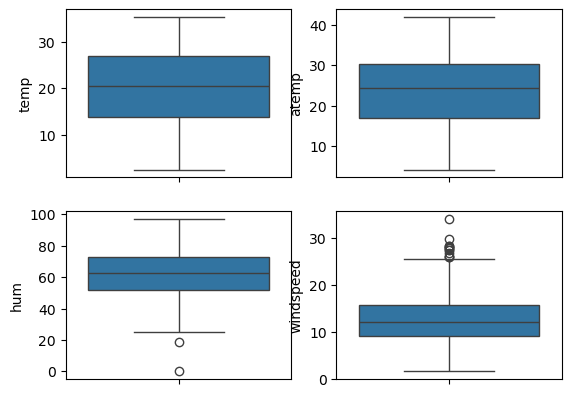

In [66]:
#plt.figure (figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(bikedata['temp'])

plt.subplot(2,2,2)
sns.boxplot(bikedata['atemp'])

plt.subplot(2,2,3)
sns.boxplot(bikedata['hum'])

plt.subplot(2,2,4)
sns.boxplot(bikedata['windspeed'])
plt.show()

In [67]:
#No requirement of outliers handling

# Bivariate analysis

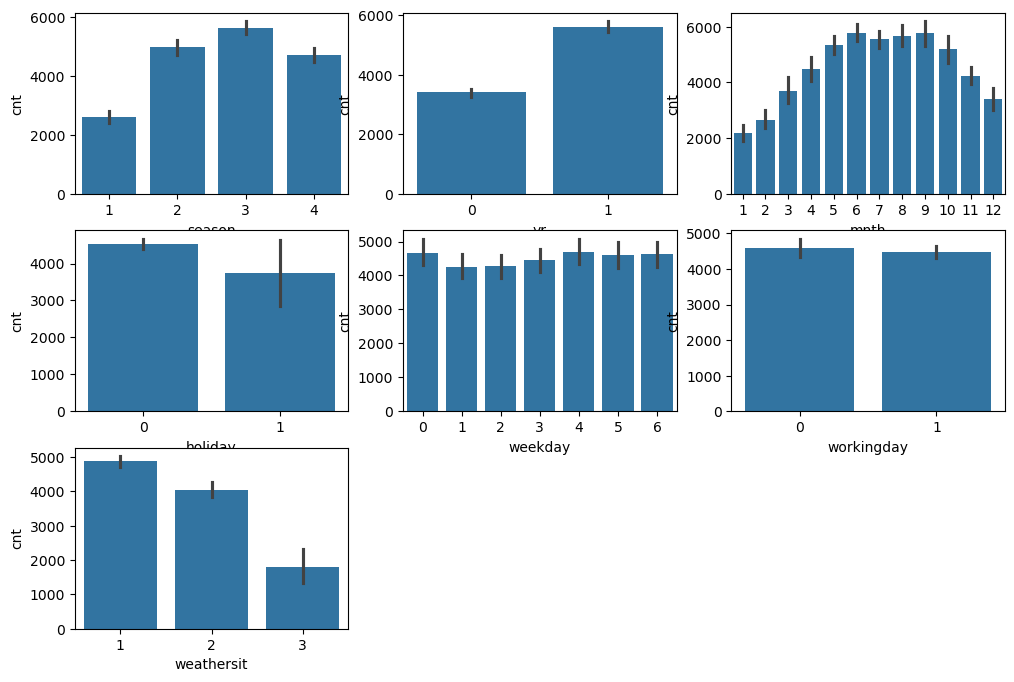

In [69]:
plt.figure (figsize=(12,8))

plt.subplot(3,3,1)
sns.barplot(bikedata, x='season', y='cnt')

plt.subplot(3,3,2)
sns.barplot(bikedata, x='yr', y='cnt')

plt.subplot(3,3,3)
sns.barplot(bikedata, x='mnth', y='cnt')

plt.subplot(3,3,4)
sns.barplot(bikedata, x='holiday', y='cnt')

plt.subplot(3,3,5)
sns.barplot(bikedata, x='weekday', y='cnt')

plt.subplot(3,3,6)
sns.barplot(bikedata, x='workingday', y='cnt')

plt.subplot(3,3,7)
sns.barplot(bikedata, x='weathersit', y='cnt')
plt.show()

In [70]:
# Inference:
#Season 3 had the highest bike rental business followed by season 2 and season 1 had the least booking of bikes.
#yr 2019 had more bike bookings compared to year 2018
# The business of bike booking was good from the month of May through October. Bike booking started to dip from the month of October
#With respect to weather situation, weathersit 1 had the heighest bike bookings.
#The bike booking throughout the week seems almost near to same

In [71]:
num_cols= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bikedata[num_cols]

temp     atemp      hum  windspeed   cnt
0    14.110847  18.18125  80.5833  10.749882   985
1    14.902598  17.68695  69.6087  16.652113   801
2     8.050924   9.47025  43.7273  16.636703  1349
3     8.200000  10.60610  59.0435  10.739832  1562
4     9.305237  11.46350  43.6957  12.522300  1600
..         ...       ...      ...        ...   ...
725  10.420847  11.33210  65.2917  23.458911  2114
726  10.386653  12.75230  59.0000  10.416557  3095
727  10.386653  12.12000  75.2917   8.333661  1341
728  10.489153  11.58500  48.3333  23.500518  1796
729   8.849153  11.17435  57.7500  10.374682  2729

[730 rows x 5 columns]

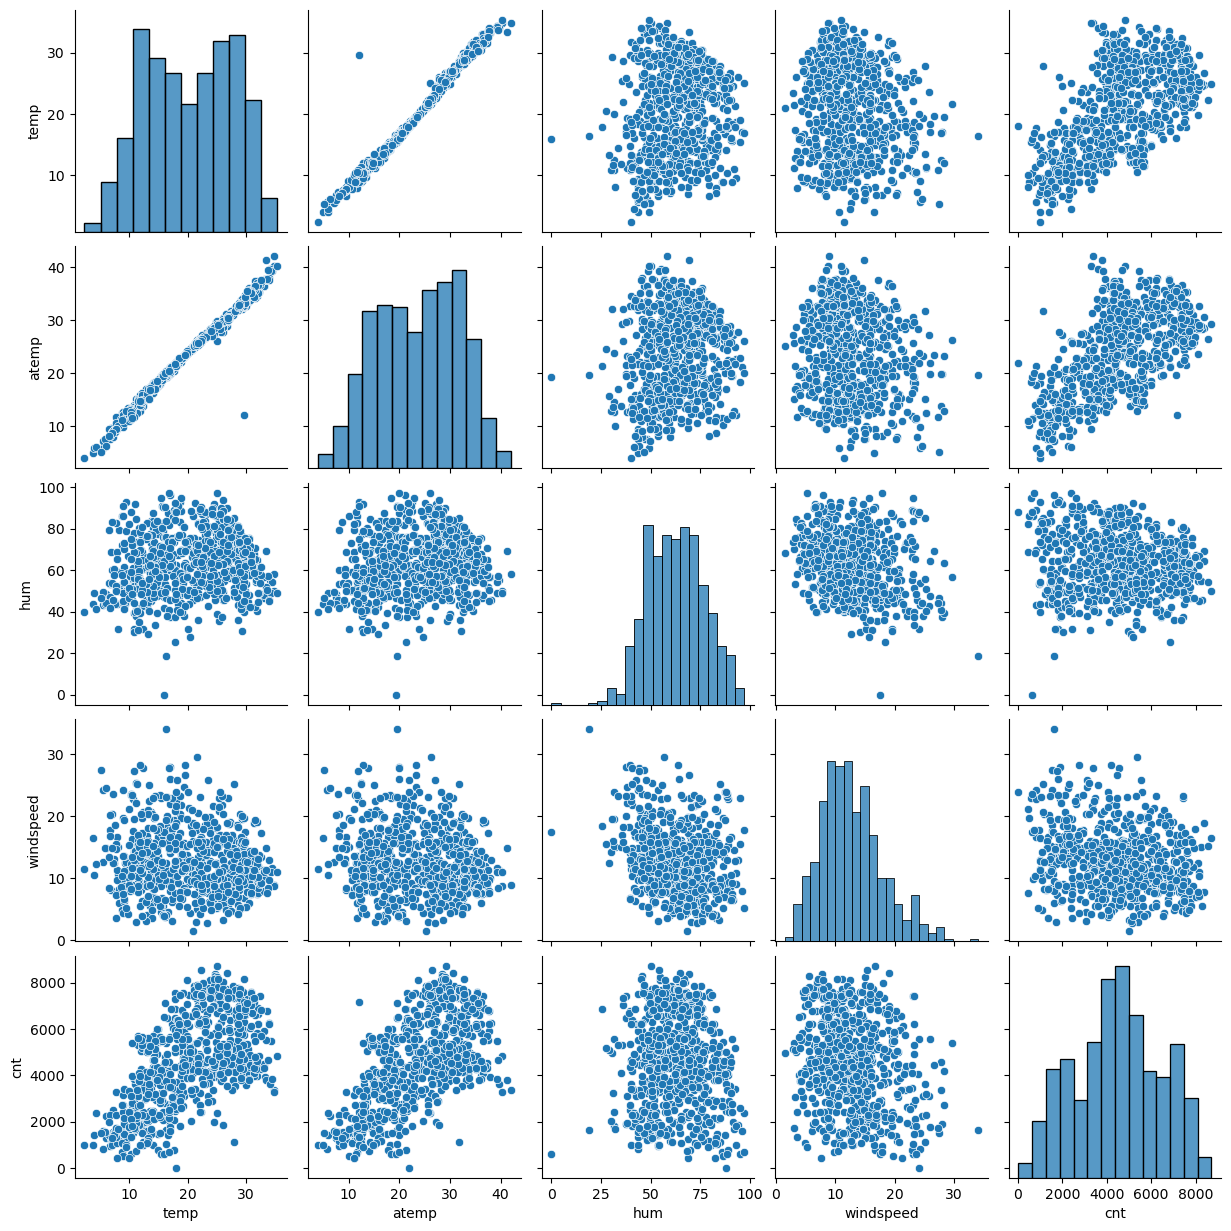

In [72]:
sns.pairplot(bikedata[num_cols])
plt.show()

In [77]:
# The pair plot analysis shows that the temp and atemp have a linear relationship with cnt.

In [78]:
bikedata.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868  0.004012   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195  0.000685   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905 -0.004059   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.020145   
weekday     4.012478e-03  6.852851e-04 -4.059002e-03 -0.020145  1.000000   
workingday  1.786841e-02 -1.185197e-02 -1.041372e-02 -0.257009  0.001588   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.034216   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764  0.044876   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703  0.037964   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662  0.008780   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257 -0.017230   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.036183   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.017868    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.011852   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.010414    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.257009   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.001588    0.034216  0.044876  0.037964  0.008780  -0.017230   
workingday    1.000000   -0.026332  0.002044  0.010657  0.053770  -0.002453   
weathersit   -0.026332    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.002044   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.010657   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.053770    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.002453    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt          -0.027640   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.036183  
workingday -0.027640  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

# Multivariate analysis

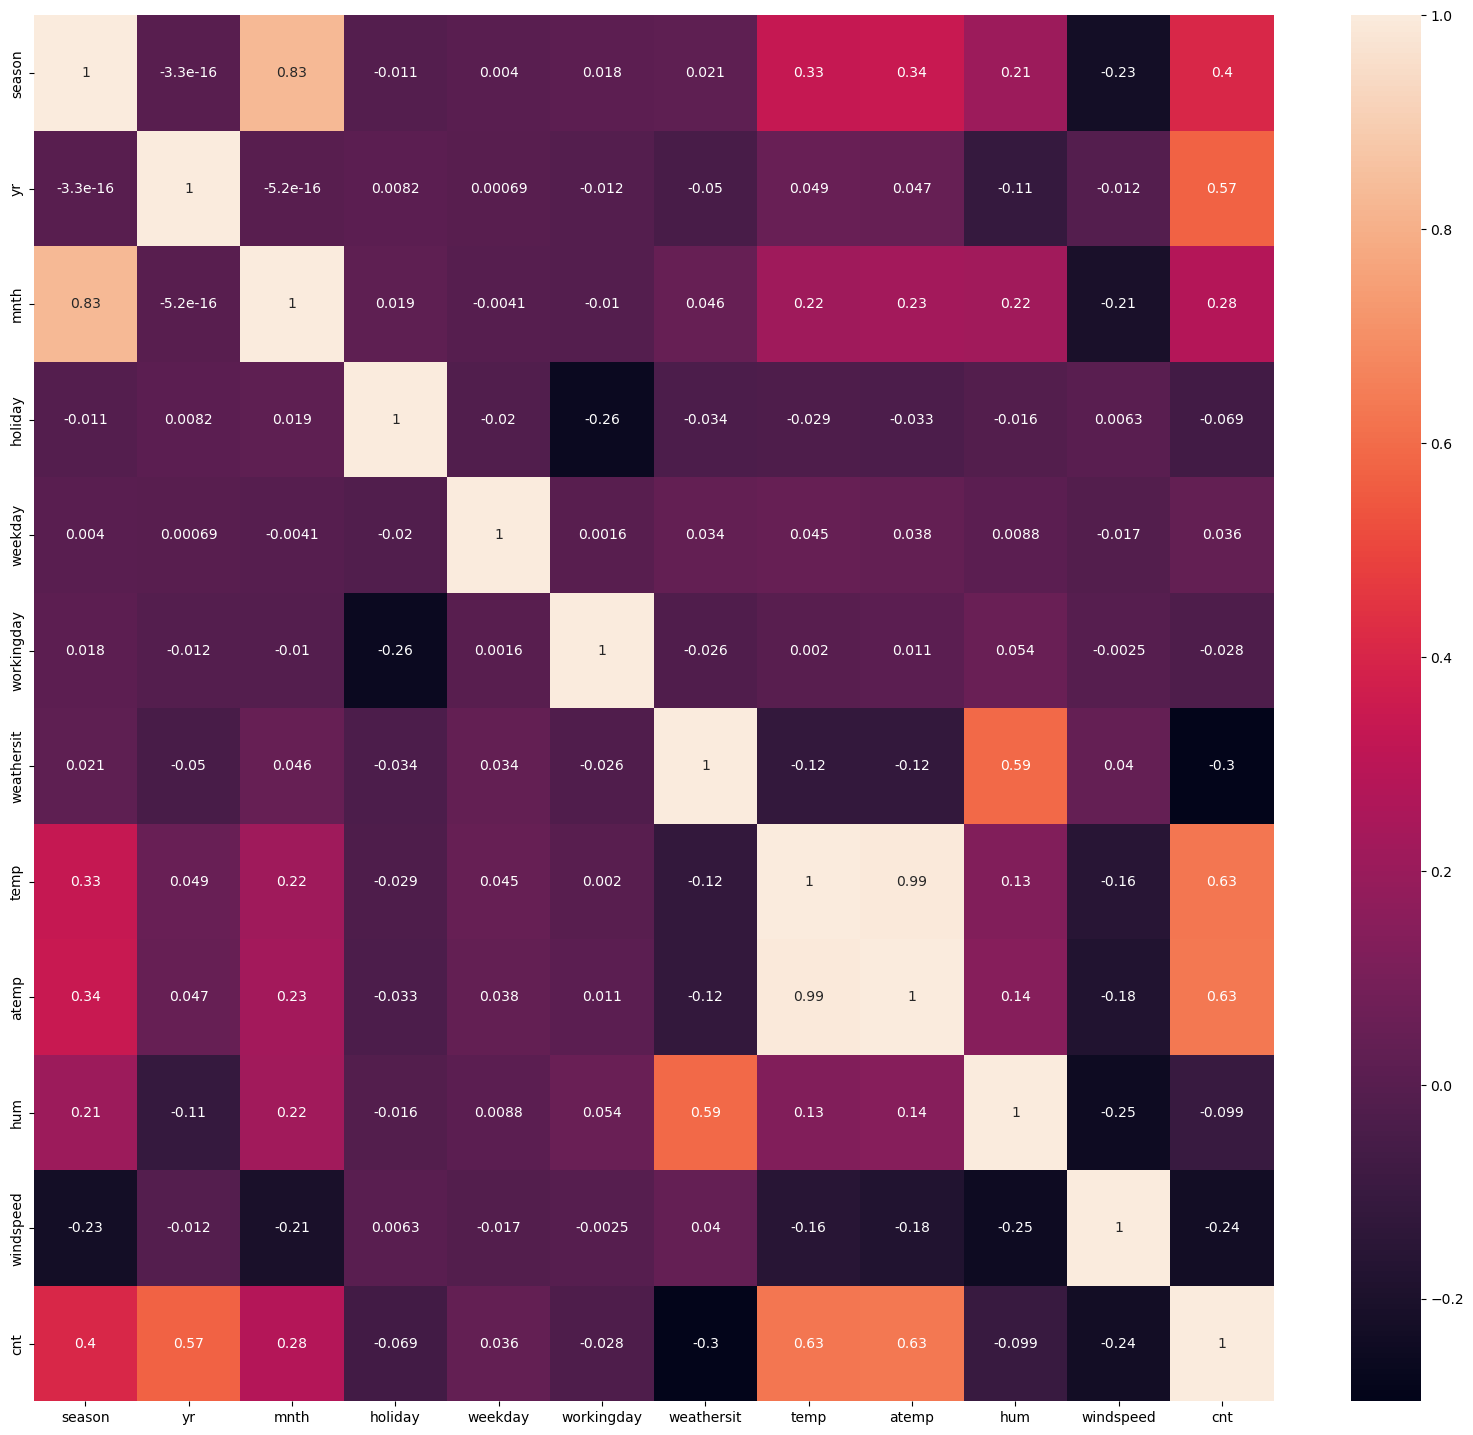

In [82]:
plt.figure(figsize = (20,18))
sns.heatmap(bikedata.corr(), annot=True)
plt.show()

In [89]:
#The heatmap shows temp and atemp have high collinearity with the target variable 'cnt'.
# Temp and atemp showing collinearity with each other as well.

# Dummy creation

In [93]:
bikedata= pd.get_dummies(bikedata, drop_first=True, dtype= int)
bikedata.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          1          0          0   
1         0         0  ...        0        0          0          1          0   
2         0         0  ...        0        0          0          0          1   
3         0         0  ...        0        0          0          0          0   
4         0         0  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 30 columns]

In [95]:
bikedata.shape

(730, 30)

# Train and Test split

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
bikedata_train, bikedata_test = train_test_split(bikedata, train_size=0.70, test_size=0.30, random_state=100)

In [102]:
print(bikedata_train.shape)
print(bikedata_test.shape)

(510, 30)
(219, 30)


In [104]:
bikedata_train.isnull().sum()

yr              0
holiday         0
workingday      0
temp            0
atemp           0
hum             0
windspeed       0
cnt             0
season_2        0
season_3        0
season_4        0
mnth_2          0
mnth_3          0
mnth_4          0
mnth_5          0
mnth_6          0
mnth_7          0
mnth_8          0
mnth_9          0
mnth_10         0
mnth_11         0
mnth_12         0
weekday_1       0
weekday_2       0
weekday_3       0
weekday_4       0
weekday_5       0
weekday_6       0
weathersit_2    0
weathersit_3    0
dtype: int64

# Rescaling of the features

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()

In [111]:
num_cols= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bikedata_train[num_cols]=scaler.fit_transform(bikedata_train[num_cols])

In [113]:
bikedata_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653  0.864243         0         0  ...        0        0          0   
576  0.827658         0         1  ...        0        0          0   
426  0.465255         0         0  ...        0        0          0   
728  0.204096         0         0  ...        0        1          1   
482  0.482973         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          0          1          0          0          0             0   
576          0          1          0          0          0             0   
426          0          0          0          0          0             1   
728          0          0          0          0          0             0   
482          0          0          0          0          0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 30 columns]

In [115]:
bikedata_train[num_cols].describe()

temp       atemp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537262    0.512989    0.650369    0.320768    0.513620
std      0.225844    0.212385    0.145882    0.169797    0.224593
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179    0.356420
50%      0.540519    0.526811    0.653714    0.296763    0.518638
75%      0.735215    0.688457    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000    1.000000

# Creation of X and y axis

In [118]:
y_train = bikedata_train.pop('cnt')
X_train = bikedata_train

In [120]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [122]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
653         0         0         1  ...        0        0          0   
576         0         1         0  ...        0        0          0   
426         0         0         0  ...        0        0          0   
728         0         0         0  ...        0        1          1   
482         1         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          0          1          0          0          0             0   
576          0          1          0          0          0             0   
426          0          0          0          0          0             1   
728          0          0          0          0          0             0   
482          0          0          0          0          0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 29 columns]

# Linear regression model building and Feature selection

In [125]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [127]:
lm = LinearRegression()

In [129]:
lm.fit(X_train, y_train)

LinearRegression()

In [131]:
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [133]:
print(rfe.ranking_)

[ 1  1  5  1  4  1  1  1  1  1 11  1  2  1  3 12  1  1  1 13 14  9 10  8
  6  7 15  1  1]


In [135]:
print(rfe.support_)

[ True  True False  True False  True  True  True  True  True False  True
 False  True False False  True  True  True False False False False False
 False False False  True  True]


In [137]:
print(X_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [139]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [141]:
selected_features=  X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [152]:
X_train[selected_features]

yr  holiday      temp       hum  windspeed  season_2  season_3  season_4  \
653   1        0  0.509887  0.575354   0.300794         0         0         1   
576   1        0  0.815169  0.725633   0.264686         0         1         0   
426   1        0  0.442393  0.640189   0.255342         0         0         0   
728   1        0  0.245101  0.498067   0.663106         0         0         0   
482   1        0  0.395666  0.504508   0.188475         1         0         0   
..   ..      ...       ...       ...        ...       ...       ...       ...   
526   1        0  0.824514  0.605840   0.355596         1         0         0   
578   1        0  0.863973  0.679690   0.187140         0         1         0   
53    0        0  0.202618  0.435939   0.111379         0         0         0   
350   0        0  0.248216  0.577930   0.431816         0         0         1   
79    0        0  0.462664  0.759870   0.529881         1         0         0   

     mnth_3  mnth_5  mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0       0       0       0        1             0             0  
576       0       0       0       0        0             0             0  
426       1       0       0       0        0             1             0  
728       0       0       0       0        0             0             0  
482       0       0       0       0        0             1             0  
..      ...     ...     ...     ...      ...           ...           ...  
526       0       0       0       0        0             1             0  
578       0       0       1       0        0             0             0  
53        0       0       0       0        0             0             0  
350       0       0       0       0        0             1             0  
79        1       0       0       0        0             1             0  

[510 rows x 15 columns]

In [154]:
rejected_features=X_train.columns[~rfe.support_]
rejected_features
X_train[rejected_features]

workingday     atemp  mnth_2  mnth_4  mnth_6  mnth_7  mnth_11  mnth_12  \
653           1  0.501133       0       0       0       0        0        0   
576           1  0.766351       0       0       0       1        0        0   
426           0  0.438975       0       0       0       0        0        0   
728           1  0.200348       0       0       0       0        0        1   
482           0  0.391735       0       1       0       0        0        0   
..          ...       ...     ...     ...     ...     ...      ...      ...   
526           1  0.762183       0       0       1       0        0        0   
578           1  0.824359       0       0       0       0        0        0   
53            1  0.218747       1       0       0       0        0        0   
350           1  0.223544       0       0       0       0        0        1   
79            1  0.434043       0       0       0       0        0        0   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
653          0          0          1          0          0          0  
576          0          0          1          0          0          0  
426          0          0          0          0          0          0  
728          1          0          0          0          0          0  
482          0          0          0          0          0          0  
..         ...        ...        ...        ...        ...        ...  
526          0          1          0          0          0          0  
578          0          0          0          0          1          0  
53           0          0          0          0          1          0  
350          1          0          0          0          0          0  
79           0          0          1          0          0          0  

[510 rows x 14 columns]

# Model building via STATS MODEL

In [157]:
import statsmodels.api as sm
import sklearn

In [159]:
# Add constant
X_train_sm= sm.add_constant(X_train[selected_features])

In [161]:
X_train_sm.head()

const  yr  holiday      temp       hum  windspeed  season_2  season_3  \
653    1.0   1        0  0.509887  0.575354   0.300794         0         0   
576    1.0   1        0  0.815169  0.725633   0.264686         0         1   
426    1.0   1        0  0.442393  0.640189   0.255342         0         0   
728    1.0   1        0  0.245101  0.498067   0.663106         0         0   
482    1.0   1        0  0.395666  0.504508   0.188475         1         0   

     season_4  mnth_3  mnth_5  mnth_8  mnth_9  mnth_10  weathersit_2  \
653         1       0       0       0       0        1             0   
576         0       0       0       0       0        0             0   
426         0       1       0       0       0        0             1   
728         0       0       0       0       0        0             0   
482         0       0       0       0       0        0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0

In [163]:
lm1 = sm.OLS(y_train, X_train_sm).fit()

In [165]:
lm1.params

const           0.237574
yr              0.230385
holiday        -0.089060
temp            0.484667
hum            -0.178353
windspeed      -0.183595
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64

In [167]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.95e-189
Time:                        16:33:01   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689      0.000       0.184       0.291
yr               0.2304      0.008     28.506      0.000       0.215       0.246
holiday         -0.0891      0.025     -3.499      0.001      -0.139      -0.039
temp             0.4847      0.034     14.073      0.000       0.417       0.552
hum             -0.1784      0.038     -4.708      0.000      -0.253      -0.104
windspeed       -0.1836      0.026     -7.164      0.000      -0.234      -0.133
season_2         0.1152      0.015      7.440      0.000       0.085       0.146
season_3         0.0436      0.023      1.898      0.058      -0.002       0.089
season_4         0.1534      0.014     10.852      0.000       0.126       0.181
mnth_3           0.0333      0.015      2.269      0.024       0.004       0.062
mnth_5           0.0307      0.018      1.717      0.087      -0.004       0.066
mnth_8           0.0511      0.017      2.931      0.004       0.017       0.085
mnth_9           0.1209      0.017      7.009      0.000       0.087       0.155
mnth_10          0.0437      0.017      2.504      0.013       0.009       0.078
weathersit_2    -0.0558      0.010     -5.340      0.000      -0.076      -0.035
weathersit_3    -0.2445      0.026     -9.265      0.000      -0.296      -0.193
==============================================================================
Omnibus:                       74.688   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.962
Skew:                          -0.747   Prob(JB):                     2.52e-41
Kurtosis:                       5.562   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# VIF check for model 1

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
X_train[selected_features].columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [175]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  24.64
3            hum  15.55
6       season_3   8.80
4      windspeed   3.80
5       season_2   3.73
7       season_4   3.13
13  weathersit_2   2.15
0             yr   2.04
10        mnth_8   1.85
9         mnth_5   1.68
12       mnth_10   1.64
11        mnth_9   1.51
8         mnth_3   1.33
14  weathersit_3   1.19
1        holiday   1.05

In [179]:
#Model 2- Removing the variable 'season_3' based on its High p-value & High VIF

In [210]:
X_train_two= X_train[selected_features].drop(['season_3'], axis=1)

In [212]:
X_train_two.head()

yr  holiday      temp       hum  windspeed  season_2  season_4  mnth_3  \
653   1        0  0.509887  0.575354   0.300794         0         1       0   
576   1        0  0.815169  0.725633   0.264686         0         0       0   
426   1        0  0.442393  0.640189   0.255342         0         0       1   
728   1        0  0.245101  0.498067   0.663106         0         0       0   
482   1        0  0.395666  0.504508   0.188475         1         0       0   

     mnth_5  mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0       0       0        1             0             0  
576       0       0       0        0             0             0  
426       0       0       0        0             1             0  
728       0       0       0        0             0             0  
482       0       0       0        0             1             0

In [214]:
X_train_two.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [232]:
# VIF check for model 2
vif = pd.DataFrame()
vif['Features'] = X_train_two.columns
vif['VIF'] = [variance_inflation_factor(X_train_two.values, i) for i in range(X_train_two.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  14.88
2           temp  10.03
4      windspeed   3.75
6       season_4   2.35
5       season_2   2.31
12  weathersit_2   2.14
0             yr   2.02
8         mnth_5   1.63
9         mnth_8   1.62
11       mnth_10   1.61
10        mnth_9   1.35
7         mnth_3   1.25
13  weathersit_3   1.18
1        holiday   1.05

In [220]:
X_train_sm2= sm.add_constant(X_train_two)

In [224]:
X_train_sm2.head()

const  yr  holiday      temp       hum  windspeed  season_2  season_4  \
653    1.0   1        0  0.509887  0.575354   0.300794         0         1   
576    1.0   1        0  0.815169  0.725633   0.264686         0         0   
426    1.0   1        0  0.442393  0.640189   0.255342         0         0   
728    1.0   1        0  0.245101  0.498067   0.663106         0         0   
482    1.0   1        0  0.395666  0.504508   0.188475         1         0   

     mnth_3  mnth_5  mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0       0       0       0        1             0             0  
576       0       0       0       0        0             0             0  
426       1       0       0       0        0             1             0  
728       0       0       0       0        0             0             0  
482       0       0       0       0        0             1             0

In [226]:
lm2 = sm.OLS(y_train, X_train_sm2).fit()

In [228]:
lm2.params

const           0.236921
yr              0.228992
holiday        -0.091254
temp            0.534218
hum            -0.186916
windspeed      -0.188142
season_2        0.097055
season_4        0.140117
mnth_3          0.026956
mnth_5          0.024691
mnth_8          0.062772
mnth_9          0.131390
mnth_10         0.038961
weathersit_2   -0.054466
weathersit_3   -0.239302
dtype: float64

In [230]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.25e-189
Time:                        16:50:52   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     495   BIC:                            -932.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.027      8.643      0.000       0.183       0.291
yr               0.2290      0.008     28.377      0.000       0.213       0.245
holiday         -0.0913      0.025     -3.580      0.000      -0.141      -0.041
temp             0.5342      0.023     23.719      0.000       0.490       0.578
hum             -0.1869      0.038     -4.956      0.000      -0.261      -0.113
windspeed       -0.1881      0.026     -7.354      0.000      -0.238      -0.138
season_2         0.0971      0.012      7.950      0.000       0.073       0.121
season_4         0.1401      0.012     11.384      0.000       0.116       0.164
mnth_3           0.0270      0.014      1.880      0.061      -0.001       0.055
mnth_5           0.0247      0.018      1.401      0.162      -0.010       0.059
mnth_8           0.0628      0.016      3.832      0.000       0.031       0.095
mnth_9           0.1314      0.016      8.021      0.000       0.099       0.164
mnth_10          0.0390      0.017      2.251      0.025       0.005       0.073
weathersit_2    -0.0545      0.010     -5.210      0.000      -0.075      -0.034
weathersit_3    -0.2393      0.026     -9.092      0.000      -0.291      -0.188
==============================================================================
Omnibus:                       65.908   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.690   Prob(JB):                     1.06e-33
Kurtosis:                       5.289   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 3- Removing the variable 'mnth_5' based on its High p-value & low VIF

In [234]:
X_train_three= X_train_two.drop(['mnth_5'], axis=1)

In [236]:
X_train_three.head()

yr  holiday      temp       hum  windspeed  season_2  season_4  mnth_3  \
653   1        0  0.509887  0.575354   0.300794         0         1       0   
576   1        0  0.815169  0.725633   0.264686         0         0       0   
426   1        0  0.442393  0.640189   0.255342         0         0       1   
728   1        0  0.245101  0.498067   0.663106         0         0       0   
482   1        0  0.395666  0.504508   0.188475         1         0       0   

     mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0       0        1             0             0  
576       0       0        0             0             0  
426       0       0        0             1             0  
728       0       0        0             0             0  
482       0       0        0             1             0

In [238]:
X_train_three.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [240]:
# VIF check for model 3
vif = pd.DataFrame()
vif['Features'] = X_train_three.columns
vif['VIF'] = [variance_inflation_factor(X_train_three.values, i) for i in range(X_train_three.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  14.75
2           temp  10.01
4      windspeed   3.69
6       season_4   2.34
11  weathersit_2   2.14
0             yr   2.02
5       season_2   1.83
8         mnth_8   1.61
10       mnth_10   1.61
9         mnth_9   1.34
7         mnth_3   1.22
12  weathersit_3   1.18
1        holiday   1.04

In [242]:
X_train_sm3= sm.add_constant(X_train_three)

In [244]:
X_train_sm3.head()

const  yr  holiday      temp       hum  windspeed  season_2  season_4  \
653    1.0   1        0  0.509887  0.575354   0.300794         0         1   
576    1.0   1        0  0.815169  0.725633   0.264686         0         0   
426    1.0   1        0  0.442393  0.640189   0.255342         0         0   
728    1.0   1        0  0.245101  0.498067   0.663106         0         0   
482    1.0   1        0  0.395666  0.504508   0.188475         1         0   

     mnth_3  mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0       0       0        1             0             0  
576       0       0       0        0             0             0  
426       1       0       0        0             1             0  
728       0       0       0        0             0             0  
482       0       0       0        0             1             0

In [248]:
lm3 =sm.OLS(y_train, X_train_sm3).fit()

In [250]:
lm3.params

const           0.232420
yr              0.228609
holiday        -0.091995
temp            0.536385
hum            -0.178989
windspeed      -0.189298
season_2        0.104860
season_4        0.139327
mnth_3          0.023825
mnth_8          0.060819
mnth_9          0.129567
mnth_10         0.038297
weathersit_2   -0.054751
weathersit_3   -0.241787
dtype: float64

In [252]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.26e-190
Time:                        17:02:08   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2324      0.027      8.529      0.000       0.179       0.286
yr               0.2286      0.008     28.318      0.000       0.213       0.244
holiday         -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp             0.5364      0.022     23.849      0.000       0.492       0.581
hum             -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed       -0.1893      0.026     -7.396      0.000      -0.240      -0.139
season_2         0.1049      0.011      9.643      0.000       0.083       0.126
season_4         0.1393      0.012     11.321      0.000       0.115       0.164
mnth_3           0.0238      0.014      1.681      0.093      -0.004       0.052
mnth_8           0.0608      0.016      3.723      0.000       0.029       0.093
mnth_9           0.1296      0.016      7.927      0.000       0.097       0.162
mnth_10          0.0383      0.017      2.212      0.027       0.004       0.072
weathersit_2    -0.0548      0.010     -5.233      0.000      -0.075      -0.034
weathersit_3    -0.2418      0.026     -9.199      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
#Model 4- Removing the variable 'mnth_3' based on its High p-value & low VIF

In [256]:
X_train_four= X_train_three.drop(['mnth_3'], axis=1)

In [258]:
X_train_four.head(1)

yr  holiday      temp       hum  windspeed  season_2  season_4  mnth_8  \
653   1        0  0.509887  0.575354   0.300794         0         1       0   

     mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0        1             0             0

In [262]:
# VIF check for model 4
vif = pd.DataFrame()
vif['Features'] = X_train_four.columns
vif['VIF'] = [variance_inflation_factor(X_train_four.values, i) for i in range(X_train_four.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  14.41
2           temp   9.88
4      windspeed   3.59
6       season_4   2.27
10  weathersit_2   2.13
0             yr   2.02
5       season_2   1.83
9        mnth_10   1.61
7         mnth_8   1.60
8         mnth_9   1.34
11  weathersit_3   1.18
1        holiday   1.04

In [264]:
X_train_sm4= sm.add_constant(X_train_four)

In [266]:
X_train_sm4.head()

const  yr  holiday      temp       hum  windspeed  season_2  season_4  \
653    1.0   1        0  0.509887  0.575354   0.300794         0         1   
576    1.0   1        0  0.815169  0.725633   0.264686         0         0   
426    1.0   1        0  0.442393  0.640189   0.255342         0         0   
728    1.0   1        0  0.245101  0.498067   0.663106         0         0   
482    1.0   1        0  0.395666  0.504508   0.188475         1         0   

     mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
653       0       0        1             0             0  
576       0       0        0             0             0  
426       0       0        0             1             0  
728       0       0        0             0             0  
482       0       0        0             1             0

In [268]:
lm4= sm.OLS(y_train, X_train_sm4).fit()

In [272]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          6.02e-191
Time:                        17:09:04   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.848      0.000       0.186       0.292
yr               0.2288      0.008     28.291      0.000       0.213       0.245
holiday         -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp             0.5308      0.022     23.821      0.000       0.487       0.575
hum             -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed       -0.1868      0.026     -7.297      0.000      -0.237      -0.136
season_2         0.1048      0.011      9.620      0.000       0.083       0.126
season_4         0.1353      0.012     11.189      0.000       0.112       0.159
mnth_8           0.0588      0.016      3.604      0.000       0.027       0.091
mnth_9           0.1280      0.016      7.829      0.000       0.096       0.160
mnth_10          0.0386      0.017      2.226      0.026       0.005       0.073
weathersit_2    -0.0546      0.010     -5.210      0.000      -0.075      -0.034
weathersit_3    -0.2401      0.026     -9.125      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
#Model 5- Removing the variable 'mnth_10' based on its p-value

In [276]:
X_train_five= X_train_four.drop(['mnth_10'], axis=1)

In [278]:
X_train_five.head()

yr  holiday      temp       hum  windspeed  season_2  season_4  mnth_8  \
653   1        0  0.509887  0.575354   0.300794         0         1       0   
576   1        0  0.815169  0.725633   0.264686         0         0       0   
426   1        0  0.442393  0.640189   0.255342         0         0       0   
728   1        0  0.245101  0.498067   0.663106         0         0       0   
482   1        0  0.395666  0.504508   0.188475         1         0       0   

     mnth_9  weathersit_2  weathersit_3  
653       0             0             0  
576       0             0             0  
426       0             1             0  
728       0             0             0  
482       0             1             0

In [280]:
# VIF check for model 5
vif = pd.DataFrame()
vif['Features'] = X_train_five.columns
vif['VIF'] = [variance_inflation_factor(X_train_five.values, i) for i in range(X_train_five.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  14.33
2           temp   9.66
4      windspeed   3.58
9   weathersit_2   2.13
0             yr   2.01
5       season_2   1.82
6       season_4   1.75
7         mnth_8   1.59
8         mnth_9   1.31
10  weathersit_3   1.16
1        holiday   1.04

In [282]:
X_train_sm5= sm.add_constant(X_train_five)

In [284]:
X_train_sm5.head()

const  yr  holiday      temp       hum  windspeed  season_2  season_4  \
653    1.0   1        0  0.509887  0.575354   0.300794         0         1   
576    1.0   1        0  0.815169  0.725633   0.264686         0         0   
426    1.0   1        0  0.442393  0.640189   0.255342         0         0   
728    1.0   1        0  0.245101  0.498067   0.663106         0         0   
482    1.0   1        0  0.395666  0.504508   0.188475         1         0   

     mnth_8  mnth_9  weathersit_2  weathersit_3  
653       0       0             0             0  
576       0       0             0             0  
426       0       0             1             0  
728       0       0             0             0  
482       0       0             1             0

In [286]:
lm5 = sm.OLS(y_train, X_train_sm5).fit()

In [290]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.43e-191
Time:                        17:12:58   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2317      0.027      8.607      0.000       0.179       0.285
yr               0.2286      0.008     28.154      0.000       0.213       0.245
holiday         -0.0958      0.026     -3.741      0.000      -0.146      -0.045
temp             0.5395      0.022     24.503      0.000       0.496       0.583
hum             -0.1759      0.037     -4.694      0.000      -0.250      -0.102
windspeed       -0.1835      0.026     -7.151      0.000      -0.234      -0.133
season_2         0.1030      0.011      9.441      0.000       0.082       0.124
season_4         0.1482      0.011     13.942      0.000       0.127       0.169
mnth_8           0.0553      0.016      3.393      0.001       0.023       0.087
mnth_9           0.1222      0.016      7.542      0.000       0.090       0.154
weathersit_2    -0.0544      0.011     -5.167      0.000      -0.075      -0.034
weathersit_3    -0.2351      0.026     -8.932      0.000      -0.287      -0.183
==============================================================================
Omnibus:                       56.424   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.275
Skew:                          -0.608   Prob(JB):                     6.26e-28
Kurtosis:                       5.101   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
lm5.params

const           0.231667
yr              0.228567
holiday        -0.095802
temp            0.539510
hum            -0.175922
windspeed      -0.183465
season_2        0.102964
season_4        0.148245
mnth_8          0.055338
mnth_9          0.122223
weathersit_2   -0.054365
weathersit_3   -0.235122
dtype: float64

In [ ]:
# linear regression model 5 (lm5) is the final model with R2 0.841 and adjusted R2 0.838, significant p-values of the predictor variables and very low multicollinearilty.

# Assumption and Model Evaluation

In [296]:
#Normal distribution of Residuals
#The relationship between the independent variables and dependent variables is assumed to be linear.
#Homoscedasticity

In [298]:
y_train_pred = lm5.predict(X_train_sm5)

In [302]:
residual= y_train-y_train_pred

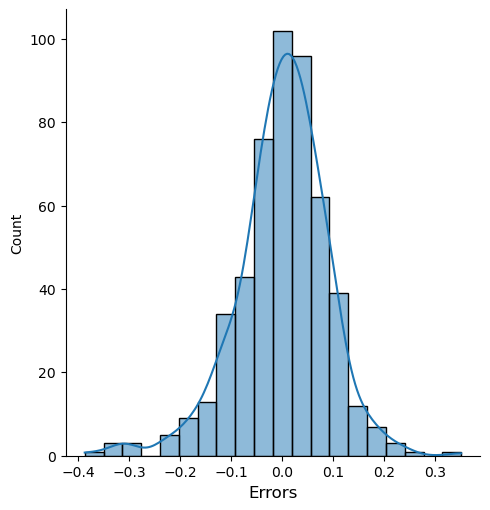

In [306]:
sns.displot(residual, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

In [308]:
#The above graph shows that the residual follow normal distribution

In [312]:
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

In [ ]:
# Train and predicted value have linear relation

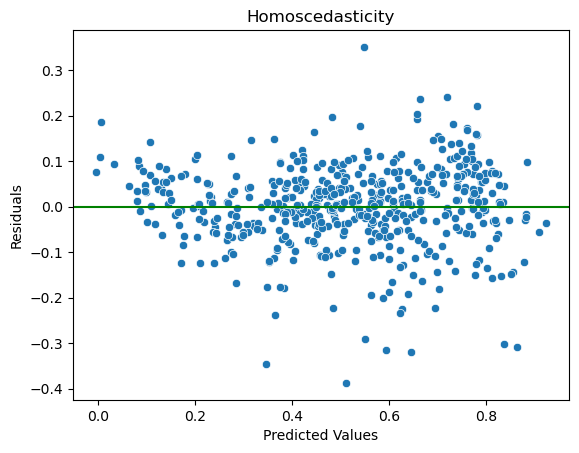

In [316]:
sns.scatterplot(x = y_train_pred, y = residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.show()

In [318]:
#The variance of residual seem to be constant across all levels of the independent variables, indicating consistent levels of variability.
#Thus, the linear model assumptions fulfil whic shows that the model is well-trained and ready for testing on the test set.

# Prediction and Evaluation on the Test Set

In [333]:
#Rescalig of the Test Dataset

In [323]:
print(bikedata_test.shape)

(219, 30)


In [327]:
bikedata_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           0  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           0  29.315000  32.19710  30.5000  19.583229  4968   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         0         1  ...        0        0          0          0   
535         1         0  ...        0        0          0          0   
299         0         0  ...        0        0          0          0   
221         0         1  ...        0        0          0          0   
152         1         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          1          0          0          0             1             0  
535          0          1          0          0             0             0  
299          0          0          0          1             1             0  
221          0          0          1          0             0             0  
152          0          0          0          1             0             0  

[5 rows x 30 columns]

In [329]:
bikedata_test[num_cols]=scaler.transform(bikedata_test[num_cols])

In [331]:
bikedata_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
184  0.692706         0         1  ...        0        0          0   
535  0.712034         1         0  ...        0        0          0   
299  0.303382         0         0  ...        0        0          0   
221  0.547400         0         1  ...        0        0          0   
152  0.569029         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          1          0          0          0             1   
535          0          0          1          0          0             0   
299          0          0          0          0          1             1   
221          0          0          0          1          0             0   
152          0          0          0          0          1             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  

[5 rows x 30 columns]

In [335]:
bikedata_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.264840    0.246575  ...    0.073059   
std      0.159947    0.218435    0.442259    0.432005  ...    0.260830   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    1.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.123288    0.155251    0.141553    0.132420   
std      0.282125    0.324202    0.329520    0.362974    0.349389    0.339723   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.173516      0.319635      0.027397  
std      0.379560      0.467403      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

In [337]:
y_test=bikedata_test.pop('cnt')
X_test=bikedata_test

In [339]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [341]:
X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
184         0         1         0  ...        0        0          0   
535         1         0         0  ...        0        0          0   
299         0         0         1  ...        0        0          0   
221         0         1         0  ...        0        0          0   
152         1         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          1          0          0          0             1   
535          0          0          1          0          0             0   
299          0          0          0          0          1             1   
221          0          0          0          1          0             0   
152          0          0          0          0          1             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  

[5 rows x 29 columns]

In [343]:
X_test_sm=sm.add_constant(X_test)

In [345]:
X_test_sm.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           0  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           0  0.817246  0.741471  0.314298   0.537414   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         0         1  ...        0        0          0          0   
535         1         0  ...        0        0          0          0   
299         0         0  ...        0        0          0          0   
221         0         1  ...        0        0          0          0   
152         1         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          1          0          0          0             1             0  
535          0          1          0          0             0             0  
299          0          0          0          1             1             0  
221          0          0          1          0             0             0  
152          0          0          0          1             0             0  

[5 rows x 30 columns]

In [349]:
X_train_sm5.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [353]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [357]:
X_test_sm= X_test_sm.drop(['workingday','atemp','season_3', 'mnth_2', 'mnth_3', 'mnth_4','mnth_5', 'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11','mnth_12','weekday_1', 'weekday_2', 'weekday_3','weekday_4',
       'weekday_5', 'weekday_6'], axis=1)

In [359]:
X_test_sm.head()

const  yr  holiday      temp       hum  windspeed  season_2  season_4  \
184    1.0   0        1  0.831783  0.657364   0.084219         0         0   
535    1.0   1        0  0.901354  0.610133   0.153728         1         0   
299    1.0   0        0  0.511964  0.837699   0.334206         0         1   
221    1.0   0        0  0.881625  0.437098   0.339570         0         0   
152    1.0   0        0  0.817246  0.314298   0.537414         1         0   

     mnth_8  mnth_9  weathersit_2  weathersit_3  
184       0       0             1             0  
535       0       0             0             0  
299       0       0             1             0  
221       1       0             0             0  
152       0       0             0             0

In [363]:
y_test_pred = lm5.predict(X_test_sm)

In [365]:
y_test_pred

184    0.399159
535    0.913948
299    0.393071
221    0.623456
152    0.621654
         ...   
400    0.367386
702    0.703597
127    0.522791
640    0.802914
72     0.283134
Length: 219, dtype: float64

In [369]:
#Evaluate

In [371]:
from sklearn.metrics import r2_score

In [403]:
r2=r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.8045626124663317

In [405]:
#The R-squared is 0.841 for training set and is 0.804 for test set. the R-squared is quite reasonable and so we can say that what the model has learned in training set is able to generalize on test set

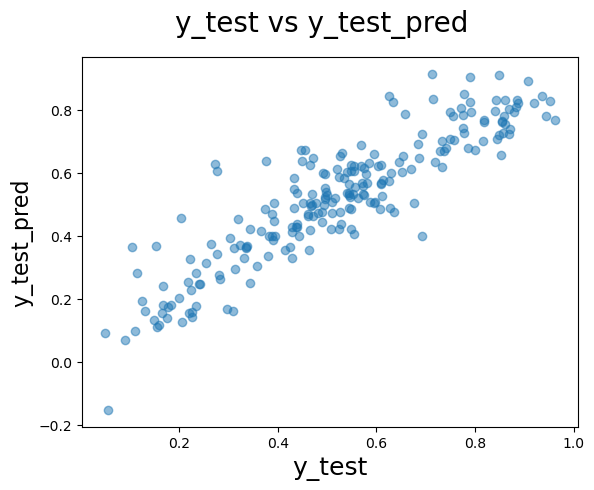

In [407]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [409]:
#Showing a linear relationship

In [411]:
#Adjusted R2 Value for TEST set

In [413]:
X_test_sm.shape

(219, 12)

In [422]:
n = X_test_sm.shape[0]
n

219

In [424]:
p = X_test_sm.shape[1]
p

12

In [426]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7931779102799044

In [429]:
#The data of R2 and adjusted R2 shows that this seems a good model that can generalize various datasets.

# Conclusion

In [432]:
lm5.params

const           0.231667
yr              0.228567
holiday        -0.095802
temp            0.539510
hum            -0.175922
windspeed      -0.183465
season_2        0.102964
season_4        0.148245
mnth_8          0.055338
mnth_9          0.122223
weathersit_2   -0.054365
weathersit_3   -0.235122
dtype: float64

In [434]:
#Temp, weathersit 3 and yr are top 3 features to influence the bike booking.
#Temperature (temp) - A coefficient value of 0.539510 indicated that a unit increase in temp variable increases the bike hire numbers by 0.539510 units.
#weathersit_3 - A coefficient value of -0.235122 indicated that a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.235122 units.
#and yr - A coefficient value of 0.228567 indicated that a unit increase in yr variable increases the bike hire numbers by 0.228567 units.